In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV

En este documento tomaremos los datos que ya hemos utilizado sobre los precios de los carros basados en algunas caracteristicas y trataremos de predecir el precio de un carro basado en las caracteristicas que tiene.

In [11]:
df = pd.read_csv(r"E:\Github\Portafolio_Analisis\DesempenoDelModelo\autos_prepared.csv")

In [12]:
df.head()

,carwidth,carlength,curbweight,enginesize,horsepower,price,fueltype
0,0.170668,0.415927,0.342192,0.258442,0.380165,0.232964,0
1,0.170668,0.415927,0.342192,0.258442,0.380165,0.317370,0
2,0.323440,0.457547,0.471404,0.353205,0.657800,0.317370,0
3,0.399825,0.551193,0.243051,0.167988,0.322056,0.245744,0
4,0.421650,0.551193,0.471874,0.284287,0.405992,0.344054,0


Como se pide se separaran los datos en 3 grupos, entrenamiento, prueba y validación. Para esto se utilizara la función train_test_split de sklearn.

In [13]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape

((123, 6), (41, 6), (41, 6))

Utilizamos estos datos para entrenar un modelo de regresión lineal y calcular el MSE para cada uno de los grupos.

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
y_val_pred = regressor.predict(X_val)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

mse_train, mse_test, mse_val

(0.007439901161853787, 0.006968072889889773, 0.012106848161528348)

El error cuadratico medio (MSE) para los diferentes conjuntos es:

Conjunto de entrenamiento: 0.00744
Conjunto de prueba: 0.00697
Conjunto de validación: 0.01211

In [15]:
difference = mse_val - mse_train

high_difference = 0.005

bias_level = ""
variance_level = ""

if mse_train > 0.01 and mse_val > 0.01:
    bias_level = "alto"
elif mse_train < 0.005 and mse_val < 0.005:
    bias_level = "bajo"
else:
    bias_level = "medio"

if difference > high_difference:
    variance_level = "alta"
elif difference < 0:
    variance_level = "baja"
else:
    variance_level = "media"

fitting_level = ""
if bias_level == "alto":
    fitting_level = "underfitt"
elif variance_level == "alta":
    fitting_level = "overfitt"
else:
    fitting_level = "fitt"

bias_level, variance_level, fitting_level

('medio', 'media', 'fitt')

Utilizamos este motor de decision para facilitar el analisis a personas que no esten familiarizadas con el tema.

Grado de sesgo: medio
Esto sugiere que el modelo está capturando la tendencia general de los datos, pero aún podría haber margen de mejora en su ajuste.

Grado de varianza: media
La diferencia entre el error en el conjunto de entrenamiento y el conjunto de validación no es muy grande, lo que indica que el modelo no está demasiado ajustado a los datos de entrenamiento.

Nivel de ajuste: fitt
El modelo no parece estar ni subajustado (underfitt) ni sobreajustado (overfitt), pero hay margen de mejora.

Para mejorar el modelo, podemos intentar aplicar técnicas de regularización. La regularización ayuda a prevenir el sobreajuste al añadir una penalización sobre la magnitud de los coeficientes. Vamos a probar la regresión Ridge, que es una técnica de regularización L2.

In [16]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

ridge_regressor = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_regressor.fit(X_train, y_train)

best_alpha = ridge_regressor.alpha_

y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
y_val_pred_ridge = ridge_regressor.predict(X_val)

mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)

best_alpha, mse_train_ridge, mse_test_ridge, mse_val_ridge

(0.1, 0.007452256648040293, 0.006907880438662776, 0.012204340977104615)

Después de aplicar la regresión Ridge con validación cruzada, obtenemos:

Mejor valor de α: 0.1
MSE en el conjunto de entrenamiento: 0.00745
MSE en el conjunto de prueba: 0.00691
MSE en el conjunto de validación: 0.01220

Comparando con el modelo original de regresión lineal:

El MSE en el conjunto de entrenamiento ha aumentado ligeramente de 0.00744 a 0.00745.
El MSE en el conjunto de prueba ha disminuido de 0.00697 a 0.00691.
El MSE en el conjunto de validación ha aumentado ligeramente de 0.01211 a 0.01220.

El cambio en el rendimiento es bastante pequeño, lo que indica que la regularización no ha tenido un impacto significativo en este conjunto de datos en particular. Aunque el modelo Ridge proporcionó un MSE ligeramente mejor en el conjunto de prueba, el rendimiento en el conjunto de validación fue casi idéntico al modelo de regresión lineal original.

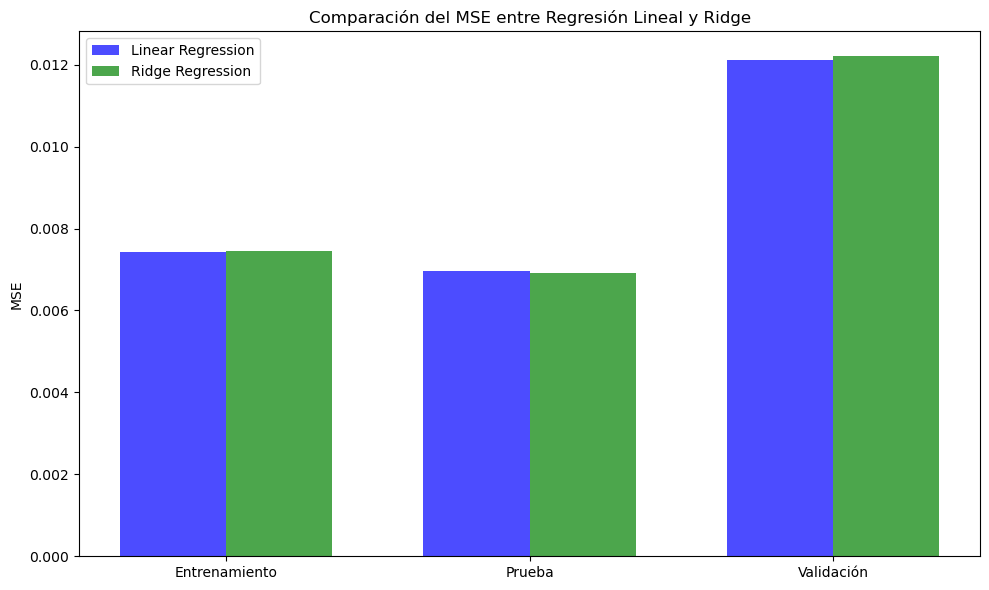

In [17]:
labels = ['Entrenamiento', 'Prueba', 'Validación']
mse_linear = [mse_train, mse_test, mse_val]
mse_ridge = [mse_train_ridge, mse_test_ridge, mse_val_ridge]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
rects1 = plt.bar(x, mse_linear, width, label='Linear Regression', color='blue', alpha=0.7)
rects2 = plt.bar([i + width for i in x], mse_ridge, width, label='Ridge Regression', color='green', alpha=0.7)

plt.ylabel('MSE')
plt.title('Comparación del MSE entre Regresión Lineal y Ridge')
plt.xticks([i + width/2 for i in x], labels)
plt.legend()

plt.tight_layout()
plt.show()

El gráfico anterior muestra una comparación del error cuadrático medio (MSE) entre la regresión lineal y la regresión Ridge para los conjuntos de entrenamiento, prueba y validación. Como puede observarse, los errores son bastante similares entre los dos modelos en todos los conjuntos.

C:\Users\David\AppData\Local\Temp\ipykernel_13396\1916894391.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, color='red')


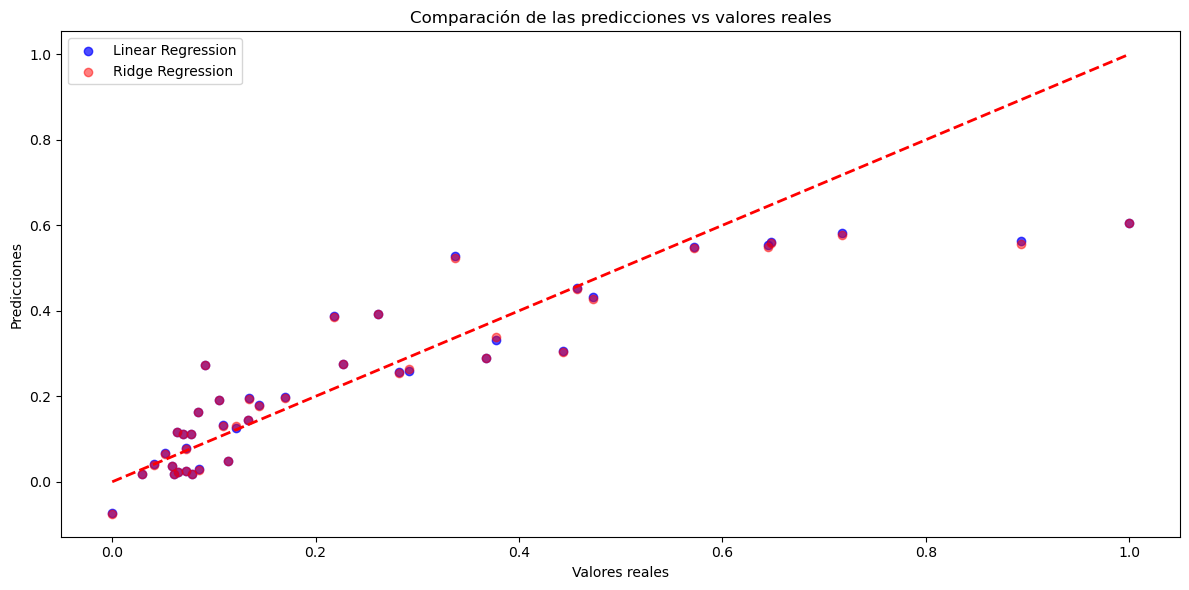

In [19]:
plt.figure(figsize=(12, 6))

plt.scatter(y_val, y_val_pred, color='blue', alpha=0.7, label="Linear Regression")

plt.scatter(y_val, y_val_pred_ridge, color='red', alpha=0.5, label="Ridge Regression")

plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, color='red')

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de las predicciones vs valores reales')
plt.legend()

plt.tight_layout()
plt.show()

El gráfico de dispersión muestra las predicciones del modelo original de regresión lineal (en azul) y del modelo Ridge (en rojo) en comparación con los valores reales del conjunto de validación. La línea roja representa una predicción perfecta (donde las predicciones coinciden exactamente con los valores reales).

Como se puede observar, ambas predicciones se agrupan cerca de la línea roja, lo que indica que ambos modelos están realizando predicciones razonablemente precisas. Sin embargo, también hay algunas predicciones que se desvían de la línea roja, lo que indica errores en esas predicciones.

En resumen, ambos modelos tienen un rendimiento similar en este conjunto de datos, y el uso de la regularización Ridge no ha proporcionado una mejora significativa en el rendimiento.